In [4]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [5]:
# Dice Sample
dice_data = np.array([i for i in range(1, 7)])
print("Random Abstract : {0}".format(np.random.choice(dice_data, 1)))

Random Abstract : [1]


In [6]:
#  Roll Dice 1,000 times
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print("{0} : {1}".format(i, p))

1 : 0.17
2 : 0.158
3 : 0.158
4 : 0.183
5 : 0.161
6 : 0.17


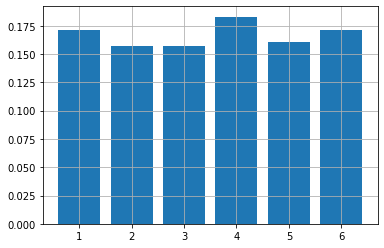

In [8]:
# Distribution
# Uniform Distribution
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i]) / calc_steps)
    
plt.bar(dice_data, prob_data)
plt.grid(True)

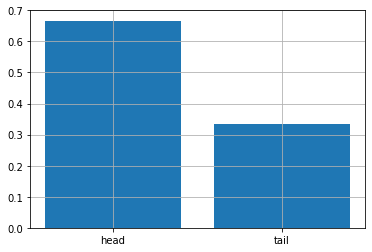

In [9]:
# Bernoulli Dist.
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 1, 1, 0, 1, 0])
for i in np.unique(coin_data):
    p = len(coin_data[coin_data == i]) / len(coin_data)
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

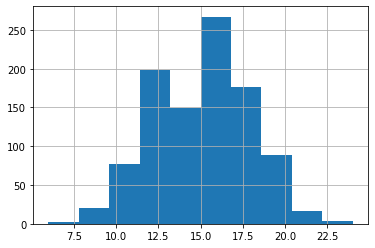

In [10]:
# Binary Dist.
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

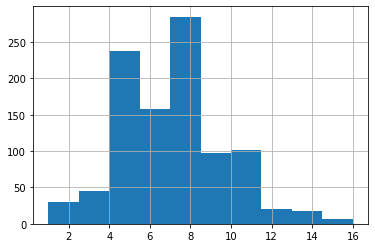

In [14]:
# Poisson Dist.
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

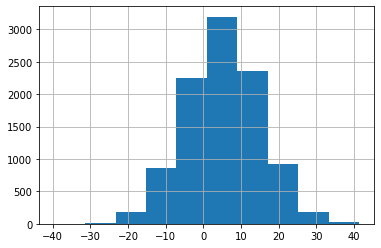

In [15]:
# Normal Dist.
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

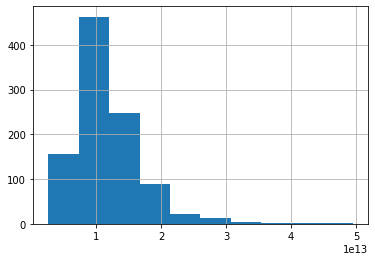

In [16]:
# LogNormal Dist.
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

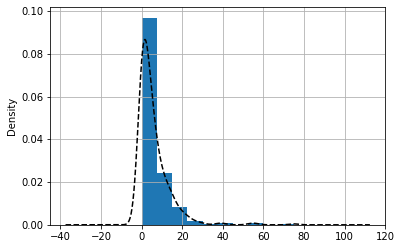

In [5]:
# Kernel Density Function
import requests
import zipfile
from io import StringIO
import io

url =  'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

# Load Data
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# Kernel Density Function
student_data_math.absences.plot(kind='kde', style='k--')

# Histgram
student_data_math.absences.hist(density=True)
plt.grid(True)

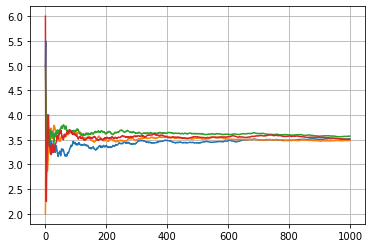

In [6]:
# 大数の法則
calc_times = 1000
sample_array = np.array([i for i in range(1, 7)])
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

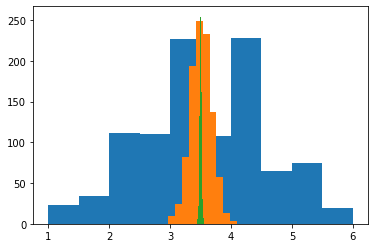

In [8]:
# 中心極限定理
def function_central_history(N):
    sample_array = np.array([i for i in range(1, 7)])
    number_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N - 1] / N)
        
    plt.hist(mean_array)
    
function_central_history(3)
function_central_history(100)
function_central_history(10000)